In [2]:
import pandas as pd
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df=df.fillna(df.mean(numeric_only=True))

In [4]:
df.isnull().sum()


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [5]:
df.isnull().sum().sum()


4681

In [6]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)


AQI_Bucket    4681
City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
dtype: int64

In [15]:
print(df.shape)

(24801, 16)


In [16]:
print(df.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [17]:
print(df['City'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [18]:
print(df['AQI_Bucket'].value_counts())

AQI_Bucket
Moderate        8813
Satisfactory    8202
Poor            2778
Very Poor       2336
Severe          1337
Good            1335
Name: count, dtype: int64


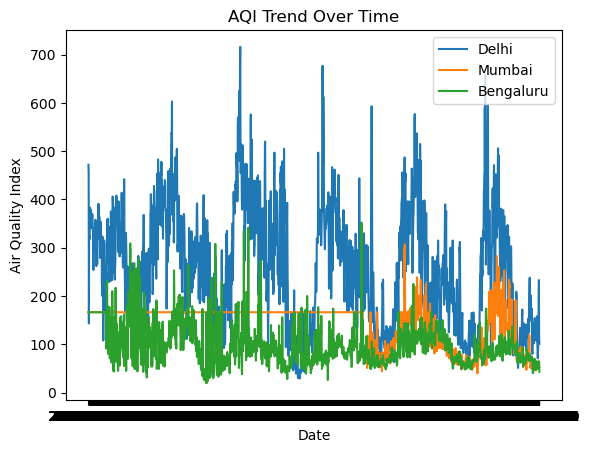

In [8]:
import matplotlib.pyplot as plt
cities=['Delhi','Mumbai','Bengaluru']
for city in cities:
    city_data=df[df['City']==city]
    plt.plot(city_data['Date'],city_data['AQI'],label=city)
plt.title("AQI Trend Over Time")
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()
           
          

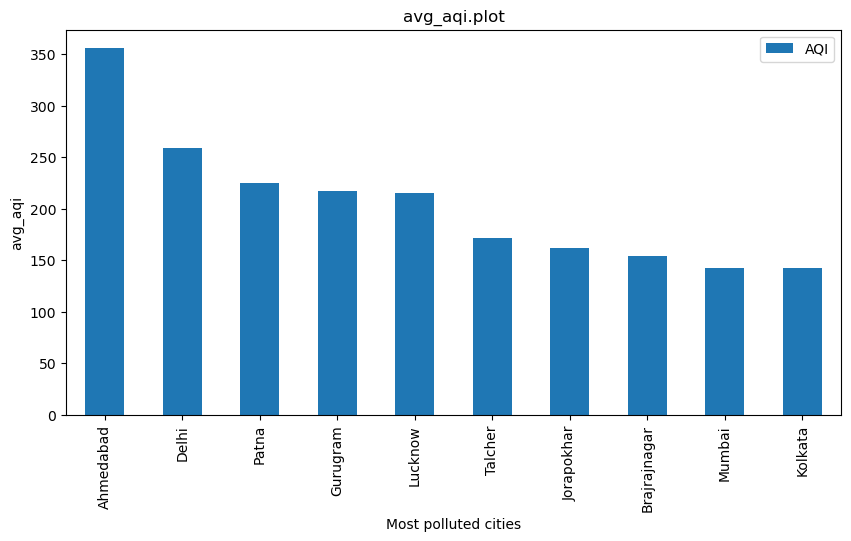

In [13]:
avg_aqi=df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
avg_aqi.plot(kind="bar",figsize=(10,5),title="Top 10 Most Polluted Cities")
plt.title("avg_aqi.plot")
plt.ylabel("avg_aqi")
plt.xlabel("Most polluted cities")
plt.legend()
plt.show()


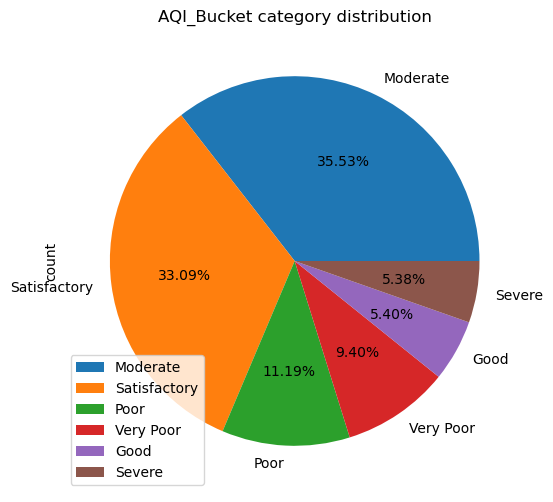

In [16]:
df['AQI_Bucket'].value_counts().plot.pie(autopct="%.2f%%",figsize=(6,6))
plt.title('AQI_Bucket category distribution')
plt.legend()
plt.show()

<Axes: >

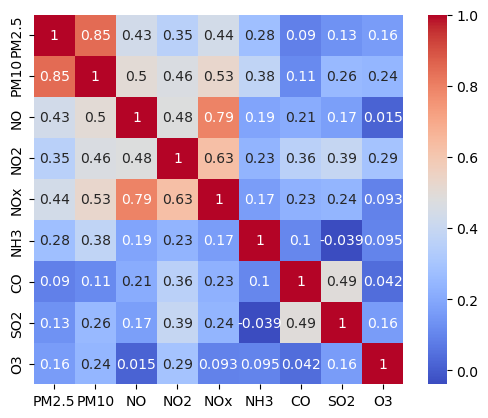

In [3]:
pollutants=df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']]
corr=pollutants.corr()
import seaborn as sns
sns.heatmap(corr,annot=True,cmap="coolwarm",square=True)

NameError: name 'plt' is not defined

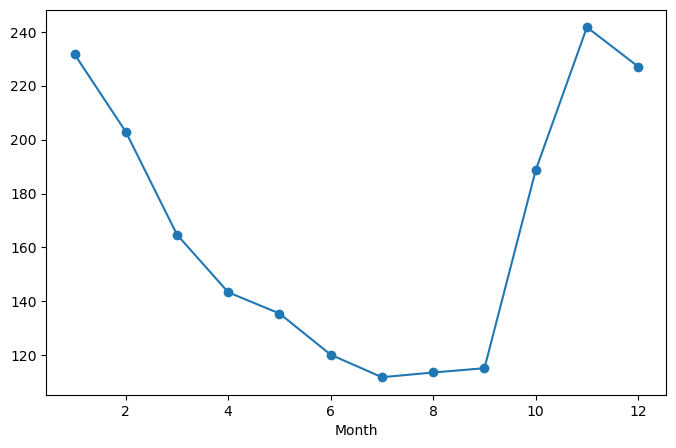

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
month_aqi=df.groupby('Month')['AQI'].mean()
month_aqi.plot(kind="line",marker="o",figsize=(8,5))
plt.title("Average Monthly AQI Trend")
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()